# Basic Neural Network

## Structure of a neuron

Input data is transformed by weights and biases into "$z$". An activation is applied to the trnasformed input into "$a$". An activation function is applied to the transformed input, introducing non-linearity in the model. The activation function allows the model to build complex decision boundaries that can work with non-linear separable data. There are 3 most commonly known activation functions

<u>i. Sigmoid</u>

Sigmoid is is a widely used activation function that helps in cpaturing non-linear relationships

$$\sigma (z) = \frac{1}{1 + e^{-z}}$$

For any value of $z$, $\sigma (z)$ will always return binary $[ 0, 1 ]$ output. Because of this, it is widely used in probability based questions. 

<u>ii. Tangent hyperbolic (tanh)</u>

It is more or less the sigmoid function but 'tanh' ranges from $[-1, 1]$ which makes it suitable for classification problems

$$tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

<u>iii. Rectified linear unit (relu)</u>

It is most used function in deep learning. It is less complex than others. $Relu(z)$ returns either $0$ or $z$

$$Relu(z) = \max(0, z) = \begin{cases}
0 & \hbox{if}\quad z < 0\\
z & o.w.
\end{cases}$$

## NN Architecture

Suppose we have some inputs $X$ and known outputs $y$. The aim of the game is to find a way of estimating $y$ based on $X$. In a way, a neural network is like any other regression or classification model. Neural nets have layers.

i. The output layer is our estimate of the probability of belonging to each class (in classification)

ii. The input layer comprises the covariates and an intercept

iii. In the middle, there is a hidden layer.

The process of training neural net is broken into the following steps

<u>Step 1:</u> Forward propagation

Training data is passed in a single direction through the netework from input layer through the hidden layers and out through the output layer

<u>Step 2:</u> Backward propagation

After the output is computed through the forward pass, we measure how the prediction is, using pre-defined loss function. The loss function outputs an error value that tells us how well the network did. The error is then sent backwards through the netowrk and the gradients are computed.

<u>Step 3:</u> Update weights

The computed gradients tell us how much each weight affects the error and uses the gradients to adjust the weights slightly towards the target values.

## Demonstration

For the demonstration purpose, there are 2 input features $X_1$ and $X_2$ that are fed into the input layer. A hidden layer has 3 neurons. Each neuron has assigned the weight parameter ($w_{11}, w_{12}, w_{13}, w_{21}, w_{22}, w_{23}, w_{31}, w_{41}, w_{51}$) as shown below

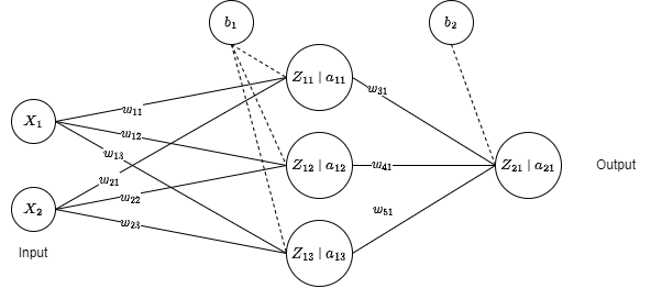

In [6]:
from utils import disp
disp('NN_basic_architecture.drawio.png', factor=1.1)

Generally, these parameters are initialized randomly. This is an example of a 2-3-1 neural network. The $\underset{\sim}{b_1}$ and $\underset{\sim}{b_2}$ are the bias parameters for the input layer and hidden layer respectively. 

There are 5 steps of NN:

1. Initialize the weight and bias parameters

2. Forward propagation

3. Compute the loss

4. Backpropagation

5. Update the weight and bias parameters

### Forward Propagation

In forward propagation, the input data are fed to the network in the forward direction. Each hidden layer gets the data, perfomrs calculations, and passes the result to the next layer. The output layer calculates the output of the model. Mathematically,

***

$$\begin{bmatrix}
Z_{11}\\ Z_{12}\\ Z_{13}\\
\end{bmatrix} = \begin{bmatrix}
w_{11} & w_{21}\\
w_{12} & w_{22}\\
w_{13} & w_{23}\\
\end{bmatrix} \begin{bmatrix}
x_1\\ x_2\\
\end{bmatrix} + \begin{bmatrix}
b_1\\b_1\\b_1\\
\end{bmatrix}$$

***

$$\begin{bmatrix}
a_{11}\\a_{12}\\a_{13}\\
\end{bmatrix} = \sigma \begin{bmatrix}
Z_{11}\\Z_{12}\\Z_{13}\\
\end{bmatrix}$$

$$\underset{\sim}{A}^{[1]} = \sigma \Bigl[ \underset{\sim}{Z^{[1]}} \Bigr]$$

***

$$\begin{bmatrix}
z_{21}\\
\end{bmatrix} = \begin{bmatrix}
w_{31} & w_{41} & w_{51}\\
\end{bmatrix} \begin{bmatrix}
a_{11} \\ a_{12} \\ a_{13}\\
\end{bmatrix} + \begin{bmatrix} b_2 \end{bmatrix}$$

$$\underset{\sim}{Z}^{[2]} = w^{[2]} A^{[1]} + b^{[2]}$$

***

$$a_{21} = \sigma ( z_{21} )$$

$$[a_{21}] = \sigma [ z_{21} ]$$

### Compute the loss (error)

Loss function: $ J = -\frac{1}{m} \sum_{i=1}^m L \Bigl( a^{[2](1)}, y^{(1)} \Bigr)$ where $L(a^{[2]}, y) = -y \log a^{[2]} - (1 - y) \log ( 1 - a^{[2]} )$

### Back propagation

Back propagation is the process of propagating the error (loss) back to the neural net and update the weights of each neuron subsequently by adjusting the weight and bias parameters. We need to choose weights that make our model "better" by some criterion. Coloqually, we train our neural net by minimizing the cross-entropy loss. Manematically, we fit it using maximum likelihood as follows




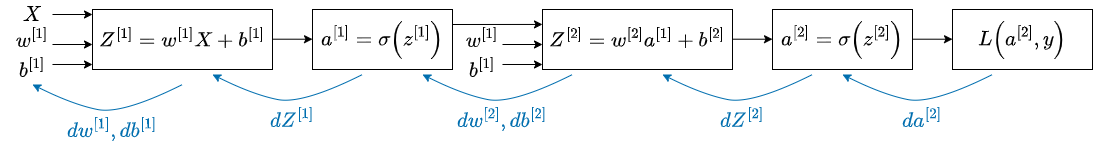

In [4]:
disp('nn_basic_propagation.drawio.png', factor=1.)

The left pointing lines represent the backpropagation of partial derivatives of the loss function wrt the variables in the network. We compute these using the chain rule. First, let's find the derivative of the sigmoid function $\sigma(x) = (1 + e^{-x})^{-1}$:

$$\sigma^\prime (x) = \Bigl(1 + e^{-x}\Bigr)^{-2} e^{-x} = \Bigl( \frac{1}{1 + e^{-x}} \Bigr) \Bigl( \frac{1 + e^{-x} - 1}{1 + e^{-x}} \Bigr) = \Bigl( \frac{1}{1 + e^{-x}} \Bigr) \Bigl( 1 - \frac{1}{1+e^{-x}} \Bigr) = \sigma(x) \bigl( 1 - \sigma(x) \bigr)$$

i. $$ \begin{align*}
d a^{[2]} &= \frac{\partial L}{\partial a^{[2]}}\\ 
&= \frac{\partial}{\partial a^{[2]}} \Bigl( -y \log a^{[2]} - (1-y) \log (1 - a^{[2]}) \Bigr)\\
&= \frac{-y}{a^{[2]}} + \frac{1 - y}{1 - a^{[2]}}\\
\end{align*}$$

Note that $a^{[2]} = \hat{y}$.

ii. $$\begin{align*}
dZ^{[2]} &= \frac{\partial L}{\partial Z^{[2]}}\\ 
&= \frac{\partial L}{\partial a^{[2]}} \times \frac{\partial a^{[2]}}{\partial Z^{[2]}}\\ 
& \hbox{\textcolor{green}{(chain rule)}}\\
&= \Bigl( \frac{-y}{a^{[2]}} + \frac{1-y}{1 - a^{[2]}} \Bigr) \bigl( \frac{\partial \sigma (z^{[2]})}{\partial Z^{[2]}} \bigr)\\
&= \Bigl( \frac{-y(1 - a^{[2]}) + (1 - y) a^{[2]}}{a^{[2]} ( 1 - a^{[2]})} \Bigr) \bigl( a^{[2]} (1 - a^{[2]}) \bigr)\\
&= -y + y a^{[2]} + a^{[2]} - y^{[2]}\\
&= a^{[2]} - y\\
\end{align*}$$

iii. $$\begin{align*}
d w^{[2]} &= \frac{\partial L}{\partial w^{[2]}}\\ 
&= \frac{\partial L}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial w^{[2]}}\\ 
&= d Z^{[2]} \Bigl( \frac{\partial}{\partial w^{[2]}} \bigl( w^{[2]} a^{[1]} + b^{[2]} \bigr) \Bigr)\\ 
&= d Z^{[2]} a^{[1]}\\
\end{align*}$$

$$\begin{align*}
db^{[2]} &= \frac{\partial L}{\partial b^{[2]}}\\
&= \frac{\partial L}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial b^{[2]}}\\
&= \partial Z^{[2]} \Bigl( \frac{\partial}{\partial b^{[2]}} \bigl( w^{[2]} a^{[1]} + b^{[2]} \bigr) \Bigr)\\
&= \partial Z^{[2]}
\end{align*}$$

iv.$$\begin{align*}
\partial a^{[1]} &= \frac{\partial L}{\partial a^{[1]}}\\
&= \frac{\partial L}{\partial Z^{[2]}} \times \frac{\partial Z^{[2]}}{\partial a^{[1]}}\\
&= \partial Z^{[2]} \times w^{[2]}\\
\end{align*}$$

v. $$\begin{align*}
\partial Z^{[1]} &= \frac{\partial L}{\partial Z^{[1]}}\\
&= \frac{\partial L}{\partial a^{[1]}} \times \frac{\partial a^{[1]}}{\partial z^{[1]}}\\
&= \Bigl( \partial Z^{[2]} \times w^{[2]} \Bigr) \times \Bigl( \frac{\partial \sigma (Z^{[1]})}{\partial Z^{[1]}} \Bigr)\\
&= \partial Z^{[2]} \times w^{[2]} \times \sigma^\prime (Z^{[1]})\\
\end{align*}$$

vi. $$\begin{align*}
\partial w^{[1]} &= \frac{\partial L}{\partial w^{[1]}}\\
&= \frac{\partial L}{\partial Z^{[1]}} \times \frac{\partial Z^{[1]}}{\partial W^{[1]}}\\
&= \partial Z^{[1]} \times \Bigl( \frac{\partial}{\partial w^{[1]}} \bigl( w^{[1]} x + b^{[1]} \bigr) \Bigr)\\
&= \partial Z^{[1]} \times x
\end{align*}$$

$$\begin{align*}
\partial b^{[1]} &= \frac{\partial L}{\partial b^{[1]}}\\
&= \frac{\partial L}{\partial Z^{[1]}} \times \frac{\partial Z^{[1]}}{\partial b^{[1]}}\\
&= \partial Z^{[1]} \times \Bigl( \frac{\partial}{\partial b^{[1]}} \bigl( w^{[1]} x + b^{[1]} \bigr) \Bigr)\\
&= \partial Z^{[1]}
\end{align*}$$

### Weight updating

The weight and bias parameters are updated as follows (for example):

$$w_{t+1}^{[1]} = w_t^{[1]} - \alpha \frac{\partial L}{\partial w_t^{[1]}}$$

$$b_{t+1}^{[1]} = b_t^{[1]} - \alpha \frac{\partial L}{\partial b_t^{[1]}}$$

$$w_{t+1}^{[2]} = w_t^{[2]} - \alpha \frac{\partial L}{\partial w_t^{[2]}}$$

$$b_{t+1}^{[2]} = b_t^{[2]} - \alpha \frac{\partial L}{\partial b_t^{[2]}}$$

$\alpha \in [0,1]$ is the learning rate that represents the step size. It controls how much to updat ethe parameter.

